# DFS, BFS and DIJKSTRA Cheat Sheet
### By François GOUJON

### Table of Contents

* [DFS](#dfs)
    * [Algorithms](#dfs_1)
    * [Paths in graphs](#dfs_2)
    * [Examples](#dfs_3)
    
* [BFS](#bfs)
    * [Algorithms](#bfs_1)
    * [Paths in graphs](#bfs_2)
    * [Examples](#bfs_3)
    
* [DIJKSTRA](#dijk)
    * [Algorithms](#dijk_1)
    * [Examples](#dijk_2)

In [161]:
# Imports
import networkx as nx
from collections import deque
import heapq
import copy

<a class="anchor" id="dfs"></a>
<h1 align="center">DFS</h1>
<h5 align="center">LIFO data structure = stack</h5>

## DFS Algorithms : <a class="anchor" id="dfs_1"></a>

#### DFS with while loop and stack

In [2]:
"""
Classical DFS to return visited nodes
"""
def dfs_1(graph, start):
    
    visited = set()
    stack = [start]
    
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            for neib in graph[vertex]:
                if neib not in visited:
                    stack.append(neib)
    return visited

"""
Classical DFS to return visited nodes optimized with Set operator
"""
def dfs_2(graph, start):
    visited = set()
    stack = [start]
    
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited) # With set, A - B = A\(AnB)
    return visited

#### DFS recursive

In [3]:
"""
Recursive DFS to return visited nodes
"""
def dfs_recur(graph, start):
    
    visited = set()
    
    def recur(graph, node):
        visited.add(node)
        for neib in (graph[node] - visited):
            recur(graph, neib)
    
    recur(graph, start)
            
    return visited

### DFS application : find paths in graphs <a class="anchor" id="dfs_2"></a>

1 - Routing Table 

In [4]:
"""
DFS graph traversal from start node. Same algo as dfs_1 and dfs_2 with routing table added.
Returns the nodes visited and a routing table to know a parent of each accesible node
which can then be used to build paths (Not shortest ones)
"""
def dfs_traversal(graph, start_node) :
    visited = set()
    stack = [(start_node, None)] # (Current Node, Parent Node) 
    routing_table = {} 
    
    while stack:
        (curr_node, parent) = stack.pop()
        if curr_node not in visited:
            visited.add(curr_node) 
            routing_table[curr_node] = parent 
            for neib in (graph[curr_node] - visited):           
                stack.append((neib, curr_node))
              
    return visited, routing_table

"""
Returns a path between 2 nodes with dfs_traversal function
"""
def routing_path_dfs(graph, start_node, final_node) :
    visited, table = dfs_traversal(graph, start_node)
    path = []
    current_node = final_node
    while current_node != start_node :
        path.append(current_node)
        current_node = table[current_node]
    path.append(start_node)
    path.reverse()
    return path

2 - Paths

In [5]:
"""
Find all the paths between start and goal in the graph, while version
"""
def dfs_paths(graph, start, goal):
    final_paths = []
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop() # To find all paths we remove the line "if vertex not in visited:"
        for neib in (graph[vertex] - set(path)):
            if neib == goal:
                final_paths.append(path + [neib])
            else:
                stack.append((neib, path + [neib]))
    return final_paths

"""
Find all the paths between start and goal in the graph, recursive version
"""
def dfs_paths_recur(graph, start, goal):
    
    final_paths = []
    
    def recur(node, path):
        if node == goal:
            final_paths.append(path.copy())
            return
        for neib in (graph[node] - set(path)):
            recur(neib, path + [neib])
    
    recur(start, [start])
    return final_paths

## Examples <a class="anchor" id="dfs_3"></a>

In [6]:
graph1 = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

graph2 = {'A': set(['B', 'C', 'F']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'G', 'I']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['H', 'E', 'A']),
         'G': set(['C']),
         'H': set(['F']),
         'I': set(['C'])}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

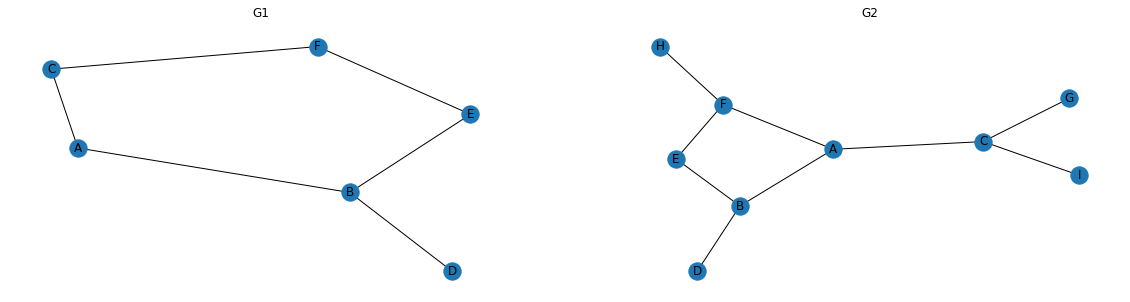

In [7]:
g1 = nx.Graph(graph1)
g2 = nx.Graph(graph2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
nx.draw(g1, with_labels = True, ax = ax1)
ax1.set_title("G1")
nx.draw(g2, with_labels = True, ax = ax2)
ax2.set_title("G2")
plt.plot()

### Visiting Nodes

In [8]:
dfs_1(graph1, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [9]:
dfs_2(graph1, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [10]:
dfs_recur(graph1, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [11]:
print("Execution Times")
print("DFS 1")
%timeit dfs_1(graph1, 'A')
print("DFS 2")
%timeit dfs_2(graph1, 'A')
print("Recursive DFS")
%timeit dfs_recur(graph1, 'A')

Execution Times
DFS 1
2.14 µs ± 54.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
DFS 2
2.11 µs ± 24.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Recursive DFS
2.49 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Finding paths

In [13]:
dfs_traversal(graph1, 'A')

({'A', 'B', 'C', 'D', 'E', 'F'},
 {'A': None, 'C': 'A', 'F': 'C', 'E': 'F', 'B': 'E', 'D': 'B'})

In [14]:
routing_path_dfs(graph1, 'A', 'B') # Routing method with dfs does not return the shortest path

['A', 'C', 'F', 'E', 'B']

In [15]:
dfs_paths(graph1, 'A', 'B')

[['A', 'B'], ['A', 'C', 'F', 'E', 'B']]

In [16]:
dfs_paths_recur(graph1, 'A', 'B')

[['A', 'B'], ['A', 'C', 'F', 'E', 'B']]

In [17]:
print("Execution Times")
print("DFS Traversal")
%timeit routing_path_dfs(graph1, 'A', 'B')
print("DFS Paths")
%timeit dfs_paths(graph1, 'A', 'B')
print("Recursive DFS Paths")
%timeit dfs_paths_recur(graph1, 'A', 'B')

Execution Times
DFS Traversal
3.36 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
DFS Paths
2.17 µs ± 63.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Recursive DFS Paths
2.64 µs ± 50.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<a class="anchor" id="bfs"></a>
<h1 align="center">BFS</h1>
<h5 align="center">FIFO data structure = queue</h5>

## BFS Algorithms : <a class="anchor" id="bfs_1"></a>

#### BFS with while loop and queue

In [18]:
"""
Classical BFS to return visited nodes. 
Exaclty same code as dfs_2 with .pop(0) instead of .pop()
"""
def bfs_1(graph, start):
    visited = set()
    queue = [start]
    
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

"""
Classical BFS with deque lib. Allows popleft() instead of pop(0) for better performance
"""
def bfs_2(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

### BFS application : find paths in graphs <a class="anchor" id="bfs_2"></a>

1 - Routing Table

In [19]:
"""
BFS graph traversal from start node. Same algo as bfs_2 with routing table added.
Returns the nodes visited and a routing table to know a parent of each accesible node
which can then be used to build paths (Shortest ones)
"""
def bfs_traversal(graph, start_node) :
    visited = set()
    queue = deque([(start_node, None)]) # (Current Node, Parent Node) 
    routing_table = {} 
    
    while queue:
        (curr_node, parent) = queue.popleft()
        if curr_node not in visited :
            visited.add(curr_node) 
            routing_table[curr_node] = parent 
            for neib in (graph[curr_node] - visited):           
                queue.append((neib, curr_node))
              
    return visited, routing_table

"""
Returns a path between 2 nodes with bfs_traversal function.
This will be the shortest path
"""
def routing_path_bfs(graph, start_node, final_node) :
    visited, table = bfs_traversal(graph, start_node)
    path = []
    current_node = final_node
    while current_node != start_node :
        path.append(current_node)
        current_node = table[current_node]
    path.append(start_node)
    path.reverse()
    return path

2 - Paths

In [47]:
"""
Find all the paths between start and goal in the graph. 
Exactly same code as dfs_paths with .pop(0) instead of .pop()
"""
def bfs_paths_1(graph, start, goal):
    final_paths = []
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for neib in (graph[vertex] - set(path)):
            if neib == goal:
                final_paths.append(path + [neib])
            else:
                queue.append((neib, path + [neib]))
    return final_paths

"""
Same code as bfs_paths_1 with deque queue.
"""
def bfs_paths_2(graph, start, goal):
    final_paths = []
    queue = deque([(start, [start])])
    while queue:
        (vertex, path) = queue.popleft()
        for neib in (graph[vertex] - set(path)):
            if neib == goal:
                final_paths.append(path + [neib])
            else:
                queue.append((neib, path + [neib]))
    return final_paths

"""
With BFS, the shortest path is the first found
"""
def shortest_path(graph, start, goal):
    try:
        return bfs_paths_2(graph, start, goal)[0]
    except:
        return None
    
"""
Since the shortest path is the first found, we can return at the first path found
Same code as bfs_paths_2
"""
def shortest_path_2(graph, start, goal):
    queue = deque([(start, [start])])
    while queue:
        (vertex, path) = queue.popleft()
        for neib in (graph[vertex] - set(path)):
            if neib == goal:
                return path + [neib]
            else:
                queue.append((neib, path + [neib]))
    # if we end up here there is no path
    return []

## Examples <a class="anchor" id="bfs_3"></a>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

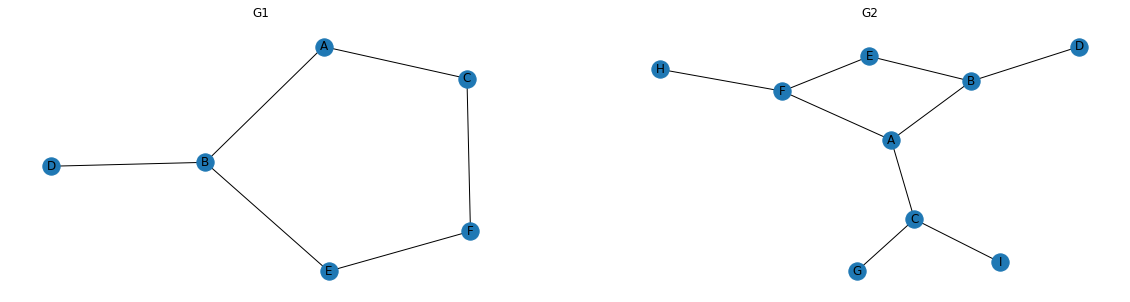

In [21]:
g1 = nx.Graph(graph1)
g2 = nx.Graph(graph2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
nx.draw(g1, with_labels = True, ax = ax1)
ax1.set_title("G1")
nx.draw(g2, with_labels = True, ax = ax2)
ax2.set_title("G2")
plt.plot()

### Visiting Nodes

In [22]:
bfs_1(graph1, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [23]:
bfs_2(graph1, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [24]:
print("Execution Times")
print("BFS 1")
%timeit bfs_1(graph1, 'A')
print("BFS 2")
%timeit bfs_2(graph1, 'A')

Execution Times
BFS 1
2.34 µs ± 98 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS 2
2.11 µs ± 52.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Finding paths

In [26]:
bfs_traversal(graph1, 'A')

({'A', 'B', 'C', 'D', 'E', 'F'},
 {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'})

In [36]:
routing_path_bfs(graph1, 'A', 'B') # Routing method woth BFS returns the shortest path

['A', 'B']

In [37]:
bfs_paths_1(graph1, 'A', 'B')

[['A', 'B'], ['A', 'C', 'F', 'E', 'B']]

In [29]:
bfs_paths_2(graph1, 'A', 'B')

[['A', 'B'], ['A', 'C', 'F', 'E', 'B']]

In [42]:
shortest_path(graph1, 'A', 'E')

['A', 'B', 'E']

In [43]:
shortest_path_2(graph1, 'A', 'E')

['A', 'B', 'E']

In [44]:
print("Execution Times")
print("BFS Traversal")
%timeit routing_path_bfs(graph1, 'A', 'E')
print("BFS Paths 1")
%timeit bfs_paths_1(graph1, 'A', 'E')
print("BFS Paths 2")
%timeit bfs_paths_2(graph1, 'A', 'E')
print("BFS shortest path 1")
%timeit shortest_path(graph1, 'A', 'E')
print("BFS shortest path 2")
%timeit shortest_path_2(graph1, 'A', 'E')

Execution Times
BFS Traversal
3.1 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS Paths 1
2.83 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS Paths 2
2.88 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS shortest path 1
2.89 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS shortest path 2
1.51 µs ± 21.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [45]:
print("Execution Times")
print("BFS Traversal")
%timeit routing_path_bfs(graph2, 'H', 'I')
print("BFS Paths 1")
%timeit bfs_paths_1(graph2, 'H', 'I')
print("BFS Paths 2")
%timeit bfs_paths_2(graph2, 'H', 'I')
print("BFS shortest path 1")
%timeit shortest_path(graph2, 'H', 'I')
print("BFS shortest path 2")
%timeit shortest_path_2(graph2, 'H', 'I')

Execution Times
BFS Traversal
4.39 µs ± 52.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS Paths 1
7.98 µs ± 52.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS Paths 2
7.87 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS shortest path 1
7.81 µs ± 244 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
BFS shortest path 2
3.73 µs ± 86.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Fastest ways to find the shortest path in unweighted graph: <br>
1 - BFS traversal <br>
2 - BFS with deque <br>
3 - BFS with list

<a class="anchor" id="dijk"></a>
<h1 align="center">DIJKSTRA</h1>

## Dijkstra Algorithms <a class="anchor" id="dijk_1"></a>

In [148]:
"""
Finds the shortest distance between start and every node it is connected to, in a weighted graph.
Returns a dictionnary with (node, (parent, distance)) as (key, value)
Since there are weights, a 3 steps path migth be shorter than a 2 steps path, and therefore we want to 
try every possible paths so we don't save the visited nodes.
Else from that, it is a BFS algorithm with distance dict added.

Possible optmization with a previous routing table : if routing[vertex][1] == previous_routing[vertex][1]
we can skip the node
"""
def dijkstra_1(graph, start):
    queue = deque([start])
    routing = {start: (None,0)}
    while queue:
        vertex = queue.popleft()  # We want to try all possible paths we remove the line "if vertex not in visited:"
        for neib in graph[vertex]: # and we check all neighbours
            dist = routing[vertex][1] + graph[vertex][neib]
            if (neib not in routing or dist < routing[neib][1]):
                routing[neib] = (vertex, dist)
                queue.append(neib)  
                    
    return routing

In [160]:
"""
Min heap class for dijkstra queue
"""
class PriorityQueue:
    """Class implementing the PriorityQueue"""

    def __init__(self, elements=[]):
        """ Can optionally take as parameter an iterable of couples (element, weight)
        with which the heap will be initialized."""
    
        self._elements = list([(w, e) for (e, w) in elements])
        heapq.heapify(self._elements)
        self._index = set([e for (_, e) in self._elements])

    def __bool__(self):
        """ Returns true if the heap is not empty, as is usually done in Python. """
        return bool(self._index)

    def __len__(self):
        """ Returns the number of elements in the heap. """
        return len(self._index)

    def add_or_replace(self, element, weight):
        """ If element is not already in the heap, inserts it with the provided weight and
        returns True. If element is already in the heap, replaces its weight and returns True
        if the provided new weight is lower than the previous one, returns False otherwise. """

        if element not in self._index:
            heapq.heappush(self._elements, (weight, element))
            self._index.add(element)
            return True
        else:
            position = [e for (_, e) in self._elements].index(element)
            (w, _) = self._elements[position]
            if (weight < w):
                self._elements[position] = (weight, element)
                heapq.heapify(self._elements)
                return True
            else:
                return False

    def pop(self):
        """ Removes the element with lowest weight and returns a couple (element,weight). """

        (w, e) = heapq.heappop(self._elements)
        self._index.remove(e)
        return (e, w)

"""
Finds the shortest distance between start and every node it is connected to, in a weighted graph
Returns a dictionnary with (node, (parent, distance)) as (key, value)
This time we use a min_heap as queue so we always pop the next nearest node to the start, allowing us to use
a visited set for better efficiency
"""
def dijkstra_2(graph, start_vertex):
    min_heap = PriorityQueue()
    min_heap.add_or_replace(start_vertex, 0)
    visited = set()
    routing_table = {start_vertex: (None, 0)} # (Parent, Distance)
    
    while min_heap :
        vertex, distance = min_heap.pop()
        if vertex not in visited:  # Not sure if this line is useful 
            visited.add(vertex)
            for neib in graph[vertex]:
                if neib not in visited :
                    distance_neib = distance + graph[vertex][neib]
                    b = min_heap.add_or_replace(neib, distance_neib)
                    if b :
                        routing_table[neib] = (vertex, distance_neib)
        else:
            print("here")
    return routing_table

"""
Returns the shortest path between 2 nodes with dijkstra function
"""
def routing_path_dijk(graph, start_node, final_node) :
    table = dijkstra_2(graph, start_node)
    path = []
    current_node = final_node
    while current_node != start_node :
        path.append(current_node)
        current_node = table[current_node][0]
    path.append(start_node)
    path.reverse()
    return path, table[final_node][1]

## Examples <a class="anchor" id="dijk_2"></a>

In [102]:
def weigthedGraph_toNX(graph):
    gnx = copy.deepcopy(graph)
    for node, neibs in gnx.items():
        for neib in neibs:
            neibs[neib] = {'weight': neibs[neib]}
    return gnx

In [137]:
graph3 = {'A':{'B':15,'C':4},'B':{'E':5},'C':{'E':3,'D':2},'D':{'E':3},'E':{'B':5, 'C':3}}
g3nx = weigthedGraph_toNX(graph3)
graph4 = {'A':{'B':15,'C':4, 'H':3},'B':{'E':5, 'G':3},'C':{'E':11,'D':2},'D':{'E':3},
          'E':{'C':11}, 'F':{'A':5, 'B':9}, 'G':{'B':3, 'E':6, 'F':10}, 'H':{'D':7, 'A':3}}
g4nx = weigthedGraph_toNX(graph4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

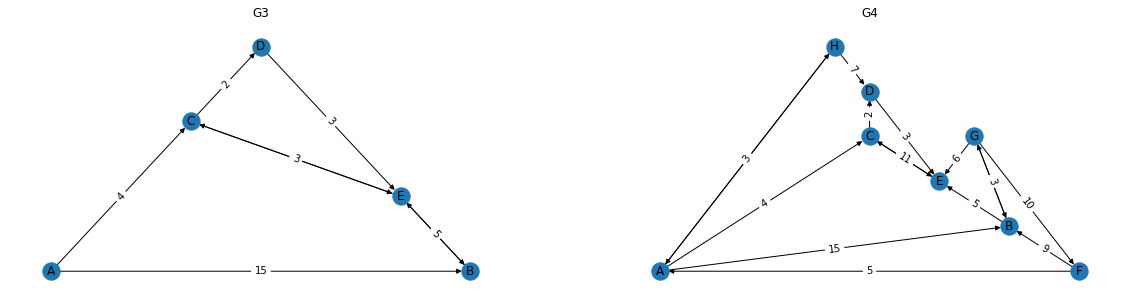

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

g3 = nx.DiGraph(g3nx)
pos3 = nx.planar_layout(g3)
edge_labels_3 = nx.get_edge_attributes(g3, "weight")
nx.draw(g3, pos3, with_labels = True, ax = ax1)
nx.draw_networkx_edge_labels(g3, pos3, edge_labels_3, ax=ax1)
ax1.set_title("G3")

g4 = nx.DiGraph(g4nx)
pos4 = nx.planar_layout(g4)
edge_labels_4 = nx.get_edge_attributes(g4, "weight")
nx.draw(g4, pos4, with_labels = True, ax = ax2)
nx.draw_networkx_edge_labels(g4, pos4, edge_labels_4, ax=ax2)
ax2.set_title("G4")

plt.plot()

In [150]:
dijkstra_1(graph3, 'A')

{'A': (None, 0), 'B': ('E', 12), 'C': ('A', 4), 'E': ('C', 7), 'D': ('C', 6)}

In [151]:
dijkstra_2(graph3, 'A')

{'A': (None, 0), 'B': ('E', 12), 'C': ('A', 4), 'E': ('C', 7), 'D': ('C', 6)}

In [152]:
routing_path_dijk(graph3, 'A', 'B')

(['A', 'C', 'E', 'B'], 12)

In [154]:
dijkstra_1(graph4, 'A')

{'A': (None, 0),
 'B': ('A', 15),
 'C': ('A', 4),
 'H': ('A', 3),
 'E': ('D', 9),
 'G': ('B', 18),
 'D': ('C', 6),
 'F': ('G', 28)}

In [153]:
dijkstra_2(graph4, 'A')

{'A': (None, 0),
 'B': ('A', 15),
 'C': ('A', 4),
 'H': ('A', 3),
 'D': ('C', 6),
 'E': ('D', 9),
 'G': ('B', 18),
 'F': ('G', 28)}

In [158]:
dijkstra_3(graph4, 'A')

{'A': (None, 0),
 'B': ('A', 15),
 'C': ('A', 4),
 'H': ('A', 3),
 'D': ('C', 6),
 'E': ('D', 9),
 'G': ('B', 18),
 'F': ('G', 28)}

In [156]:
print("Execution Times")
print("Dijkstra 1 G3")
%timeit dijkstra_1(graph3, 'A')
print("Dijkstra 2 G3")
%timeit dijkstra_2(graph3, 'A')
print("Dijkstra 1 G4")
%timeit dijkstra_1(graph4, 'A')
print("Dijkstra 2 G4")
%timeit dijkstra_2(graph4, 'A')

Execution Times
Dijkstra 1 G3
3.19 µs ± 32.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Dijkstra 2 G3
7.42 µs ± 78 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Dijkstra 1 G4
4.87 µs ± 52.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Dijkstra 2 G4
11 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
